In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings


warnings.filterwarnings('ignore')

In [5]:
# Nombres de los archivos en formato parquet
archivos_parquet = ['clean_df_ur.parquet', 'clean_df_ui.parquet', 'clean_df_sg.parquet']

# Cargar el primer archivo parquet
df_ur = pd.read_parquet('../DataSet/' + archivos_parquet[0])

In [6]:
# Cargar el segundo archivo parquet
df_ui = pd.read_parquet('../DataSet/' + archivos_parquet[1])


In [7]:

# Cargar el tercer archivo parquet
df_sg = pd.read_parquet('../DataSet/' + archivos_parquet[2])

In [8]:
df_ur

,user_id,item_id,recommend,posted_year,sentiment_analysis
0,76561197970982479,1250,True,2011,2
1,76561197970982479,22200,True,2011,2
2,76561197970982479,43110,True,2011,2
3,js41637,251610,True,2014,2
4,js41637,227300,True,2013,0
...,...,...,...,...,...
59300,76561198312638244,70,True,2016,2
59301,76561198312638244,362890,True,2016,2
59302,LydiaMorley,273110,True,2016,2
59303,LydiaMorley,730,True,2016,2


In [9]:
df_ui

,user_id,items_count,steam_id,item_id,item_name,playtime_forever
0,76561197970982479,277,76561197970982479,10,Counter-Strike,6.0
1,76561197970982479,277,76561197970982479,30,Day of Defeat,7.0
2,76561197970982479,277,76561197970982479,300,Day of Defeat: Source,4733.0
3,76561197970982479,277,76561197970982479,240,Counter-Strike: Source,1853.0
4,76561197970982479,277,76561197970982479,3830,Psychonauts,333.0
...,...,...,...,...,...,...
3285241,76561198329548331,7,76561198329548331,304930,Unturned,677.0
3285242,76561198329548331,7,76561198329548331,227940,Heroes & Generals,43.0
3285243,76561198329548331,7,76561198329548331,388490,One Way To Die: Steam Edition,3.0
3285244,76561198329548331,7,76561198329548331,521570,You Have 10 Seconds 2,4.0


In [10]:
df_sg

,title,price,early_access,id,genres,developer,release_year
0,Lost Summoner Kitty,4.99,False,761140,"Action, Casual, Indie, Simulation, Strategy",Kotoshiro,2018
1,Ironbound,0.00,False,643980,"Free to Play, Indie, RPG, Strategy",Secret Level SRL,2018
2,Real Pool 3D - Poolians,0.00,False,670290,"Casual, Free to Play, Indie, Simulation, Sports",Poolians.com,2017
3,弹炸人2222,0.99,False,767400,"Action, Adventure, Casual",彼岸领域,2017
4,Battle Royale Trainer,3.99,False,772540,"Action, Adventure, Simulation",Trickjump Games Ltd,2018
...,...,...,...,...,...,...,...
27630,Kebab it Up!,1.99,False,745400,"Action, Adventure, Casual, Indie",Bidoniera Games,2018
27631,Colony On Mars,1.99,False,773640,"Casual, Indie, Simulation, Strategy","Nikita ""Ghost_RUS""",2018
27632,LOGistICAL: South Africa,4.99,False,733530,"Casual, Indie, Strategy",Sacada,2018
27633,Russian Roads,1.99,False,610660,"Indie, Racing, Simulation",Laush Dmitriy Sergeevich,2018


# Estadísticas descrptivas

## Realizamos una primera aproximación a los DataFrames que ya transformamos durante la etapa del ETL. Para ello utilizamos estadísticas descriptivas.

### Conclusiones del DataFrame df_ur, que son las transformaciones hechas sobre el DataSet australian_user_reviews. Este DataFrame trata, principalmente,  sobre opiniones de los usuarios.

Observando la columna "item_id", cuyos datos varían entre 10 y 527340, con una media de 169935, se puede concluir que contiene una amplia gama de juegos reseñados.

Respecto a la columna "posted_year", se observa que los años van desde 2010 hasta 2016, con una concentración alrededor de 2014. Esto sugiere que la mayoría de las reseñas fueron publicadas alrededor de ese año.

Finalmente, las estadísticas descriptivas de la columna "sentiment_analysis" nos muestra que la mayoría de las reseñas tienen un valor de 2 (positivo), con un valor medio de 1.35. Esto indica una tendencia general hacia reseñas positivas en el conjunto de datos.


In [11]:
# Estadísticas descriptivas para df_ur
print(df_ur.describe())

             item_id   posted_year  sentiment_analysis
count   59305.000000  59305.000000        59305.000000
mean   169935.176511   2014.465829            1.350476
std    132029.464174      1.035367            0.810863
min        10.000000   2010.000000            0.000000
25%      8930.000000   2014.000000            1.000000
50%    218230.000000   2014.000000            2.000000
75%    261760.000000   2015.000000            2.000000
max    527340.000000   2016.000000            2.000000


### Conclusiones del DataFrame df_ui, que son las transformaciones hechas sobre el DataSet australian_users_items. Este DataFrame trata principalmente sobre información de los usuarios y juegos.

La columna "items_count" nos informa sobre el número de juegos por usuario. Presenta una media de aproximadamente 247, pero con una alta desviación estándar, lo que sugiere una variabilidad considerable en la cantidad de juegos por usuario.

La columna "steam_id" solo informa sobre el identificador único de cada usuario.

Al igual que en el DataFrame df_ur, la columna "item_id", con datos que varían entre 10.0 y 528660, nos muestra que existe una amplia gama de juego en el DataFrame.

Finalmente, la columna "playtime_forever" reseña el tiempo de juego de los usuarios en horas. Este tiempo de juego varía enormemente (de 1 a 642773 horas), con una media de 1555 horas. La gran desviación estándar indica una amplia dispersión en el tiempo de juego entre diferentes usuarios.

In [12]:
# Estadísticas descriptivas para df_ui
print(df_ui.describe())

        items_count      steam_id        item_id  playtime_forever
count  3.285246e+06  3.285246e+06      3285246.0      3.285246e+06
mean   2.474606e+02  7.656120e+16  177237.330951      1.555251e+03
std    5.654248e+02  3.769564e+07  126674.065448      6.721032e+03
min    1.000000e+00  7.656120e+16           10.0      1.000000e+00
25%    6.600000e+01  7.656120e+16        39120.0      4.400000e+01
50%    1.220000e+02  7.656120e+16       214950.0      2.050000e+02
75%    2.290000e+02  7.656120e+16       263060.0      8.080000e+02
max    7.762000e+03  7.656120e+16       528660.0      6.427730e+05


### Conclusiones del DataFrame df_sg, que son las transformaciones hechas sobre el DataSet output_steam_games. Este DataFrame trata principalmente sobre información de los juegos.

En la columna "price" vemos que el precio de los juegos varía desde 0 hasta 995, con una media de alrededor de 9. Esto sugiere que hay una mezcla de juegos gratuitos y de pago, con una tendencia hacia precios bajos y moderados.

La columna "id" es sólo el identificador único de cada juego.

Para cerrar, la columna "release_year" informa que los años de lanzamiento van de 1983 a 2021, pero la mayoría se concentra después de 2014. Esto indica que la mayor parte del conjunto de datos contiene juegos más recientes.

In [13]:
# Estadísticas descriptivas para df_sg
print(df_sg.describe())

              price            id  release_year
count  27635.000000  2.763500e+04  27635.000000
mean       9.008304  4.408806e+05   2014.857391
std       16.041755  1.862946e+05      3.275094
min        0.000000  1.000000e+01   1983.000000
25%        2.990000  3.165510e+05   2014.000000
50%        4.990000  4.366510e+05   2016.000000
75%        9.990000  5.869450e+05   2017.000000
max      995.000000  2.028850e+06   2021.000000


# Exploración y visualización de datos.

Se procede a explorar las columnas que pueden ser útiles para crear el modelo de recomendación item-item.

## Visualización de datos de la columna "price"

El boxplot y las estadísticas descriptivas de la columna "price" indican que, aunque la mayoría de los juegos tienen precios bajos o moderados, existe un número considerable de juegos con precios mucho más altos, lo que provoca un sesgo en la distribución de precios.

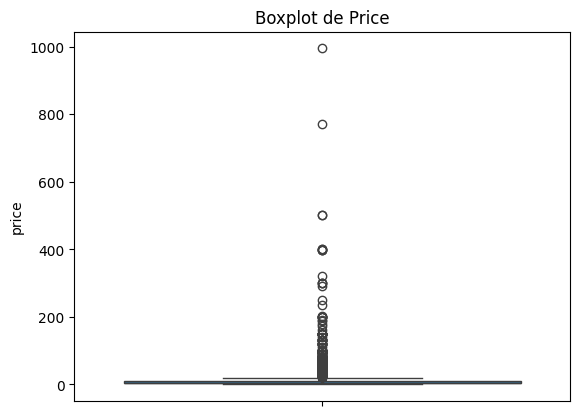

In [14]:
# Boxplot para la columna 'price' 
sns.boxplot(df_sg['price'])
plt.title("Boxplot de Price")
plt.show()


In [15]:
# Estadísticas descriptivas para 'price' en df_sg
price_stats = df_sg['price'].describe()
print("Estadísticas Descriptivas de Price:\n", price_stats)

Estadísticas Descriptivas de Price:
 count    27635.000000
mean         9.008304
std         16.041755
min          0.000000
25%          2.990000
50%          4.990000
75%          9.990000
max        995.000000
Name: price, dtype: float64


## Visualización de datos de la columna "playtime_forever"

El boxplot y las estadísticas descriptivas de la columna "playtime_forever" indican que la mayoría de los jugadores tiene un tiempo de juego relativamente moderado, pero hay una cantidad significativa de usuarios con tiempos de juego mucho más altos. Esto podría sugerir que hay algunos jugadores extremadamente dedicados al gaming que distorsionan la media hacia un valor más alto. La presencia de estos valores más alejados de la media no implican necesariamente un error en la recolección de los datos, pero pueden distorsionar el modelo de recomendación imposibilitando realizar una recomendación óptima para el usuario.

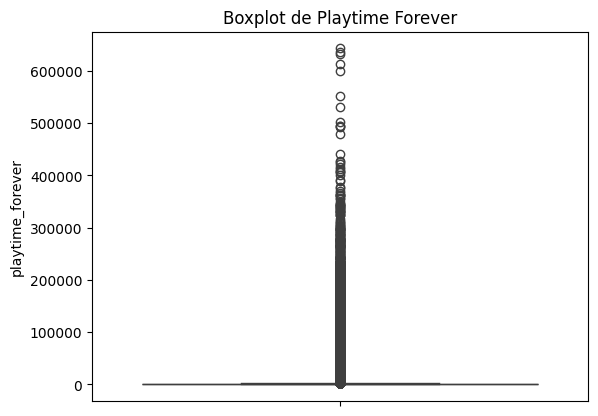

In [16]:
# Boxplot para la columna 'playtime_forever' en el DataFrame df_ui
sns.boxplot(df_ui['playtime_forever'])
plt.title("Boxplot de Playtime Forever")
plt.show()


In [17]:
# Estadísticas descriptivas para 'playtime_forever' en df_ui
playtime_forever_stats = df_ui['playtime_forever'].describe()
print("Estadísticas Descriptivas de Playtime Forever:\n", playtime_forever_stats)

Estadísticas Descriptivas de Playtime Forever:
 count    3.285246e+06
mean     1.555251e+03
std      6.721032e+03
min      1.000000e+00
25%      4.400000e+01
50%      2.050000e+02
75%      8.080000e+02
max      6.427730e+05
Name: playtime_forever, dtype: float64


Puesto que hemos detectado la presencia de valores outliers en la columna 'playtime_forever', se genera el código para identificar y contar los valores atípicos de la columna. 

Se utiliza el método de rango intercuartílico (IQR), que considera outliers a aquellos valores que están por debajo del primer cuartil menos 1.5 veces el IQR o, por otro lado, por encima del tercer cuartil más 1.5 veces el IQR. 

In [18]:
# Calcular el primer cuartil (Q1) 
Q1 = df_ui['playtime_forever'].quantile(0.25)

# Calcular el tercer cuartil (Q3)
Q3 = df_ui['playtime_forever'].quantile(0.75)

# Calcular el rango intercuartílico (IQR), que es la diferencia entre el tercer y primer cuartil
IQR = Q3 - Q1

# Definir el límite inferior para identificar outliers (cualquier valor por debajo de este límite se considera un outlier)
lower_bound = Q1 - 1.5 * IQR

# Definir el límite superior para identificar outliers. (cualquier valor por encima de este límite se considera un outlier)
upper_bound = Q3 + 1.5 * IQR

# Identificar los outliers. 
outliers = df_ui[(df_ui['playtime_forever'] < lower_bound) | (df_ui['playtime_forever'] > upper_bound)]

# Contar el número total de outliers identificados 
num_outliers = outliers.shape[0]

# Imprimir el número de outliers encontrados en 'playtime_forever'
print(f"Número de outliers en 'playtime_forever': {num_outliers}")


Número de outliers en 'playtime_forever': 436754


In [19]:
# Calcular estadísticas descriptivas para los valores atípicos (outliers) en la columna
outliers_descriptive_stats = outliers['playtime_forever'].describe()

print("Estadísticas Descriptivas de los Outliers en 'playtime_forever':")
print(outliers_descriptive_stats)



Estadísticas Descriptivas de los Outliers en 'playtime_forever':
count    436754.000000
mean       9548.784256
std       16275.314024
min        1955.000000
25%        2783.000000
50%        4430.000000
75%        9093.000000
max      642773.000000
Name: playtime_forever, dtype: float64


In [20]:
# Calcular estadísticas descriptivas para la columna 'playtime_forever' 
general_descriptive_stats = df_ui['playtime_forever'].describe()

print("Estadísticas Descriptivas del Conjunto General en 'playtime_forever':")
print(general_descriptive_stats)


Estadísticas Descriptivas del Conjunto General en 'playtime_forever':
count    3.285246e+06
mean     1.555251e+03
std      6.721032e+03
min      1.000000e+00
25%      4.400000e+01
50%      2.050000e+02
75%      8.080000e+02
max      6.427730e+05
Name: playtime_forever, dtype: float64


La columna playtime_forever presenta una amplia gama de valores, que van desde tan solo 1 hora hasta 642,773 horas, lo que demuestra una gran variabilidad en el tiempo de juego de los usuarios. La presencia de un número significativo de outliers (436,754, que representan aproximadamente el 13% del total de los datos) indica una distribución sesgada de los datos.

La media del conjunto completo de datos es de 1,555 horas, mientras que la media para los outliers es considerablemente más alta, aproximadamente 9,549 horas. Estos outliers pueden tener un impacto significativo en la media general, desplazándola hacia valores más altos. Además, la alta desviación estándar (6,721 horas para el conjunto completo y 16,275 horas para los outliers) refleja esta gran variabilidad y el sesgo de los datos.

Estos valores atípicos tienen implicaciones para el modelo de recomendación, pues pueden generar distorsiones en los resultados del modelo, especialmente si se basa en la similitud del coseno, ya que los tiempos de juego extremadamente altos podrían influir desproporcionadamente en la similitud calculada entre ítems.

Para resolver este problema, se transforman los valores de playtime_forever utilizando el logaritmo natural, lo que puede ayudar a reducir el impacto de los outliers extremos y normalizar la distribución de los datos. La función np.log1p es útil porque evita problemas con valores de cero, ya que log(0) no está definido y ello asegura que no se produzcan errores matemáticos o valores indefinidos cuando x es 0.

Con esta transformación esperamos reducir el sesgo y la variabilidad de los datos haciendo más fácil manejar los datos y con ello mejorar la interpretación de los mismos.

In [21]:
# np.log1p se usa para manejar valores de cero, ya que log(0) es indefinido
df_ui['playtime_forever_log'] = np.log1p(df_ui['playtime_forever'])

# Mostrar estadísticas descriptivas de la columna transformada
print("Estadísticas Descriptivas de 'playtime_forever' tras Transformación Logarítmica:")
print(df_ui['playtime_forever_log'].describe())

Estadísticas Descriptivas de 'playtime_forever' tras Transformación Logarítmica:
count    3.285246e+06
mean     5.245486e+00
std      2.129951e+00
min      6.931472e-01
25%      3.806662e+00
50%      5.327876e+00
75%      6.695799e+00
max      1.337355e+01
Name: playtime_forever_log, dtype: float64


La transformación logarítmica aplicada a los datos de playtime_forever ha tenido varios efectos positivos que son evidentes en las estadísticas descriptivas.

En primer lugar, se ha reducido la dispersión de los datos, lo que mitiga el impacto de los valores extremadamente altos.

En segundo lugar, el rango de los datos transformados es más manejable y menos extremo en comparación con el rango original de playtime_forever. Esto facilita el manejo y la interpretación de los datos.

Finalmente, la media y la mediana (50% percentil) de los datos transformados están más cercanas, lo que sugiere una distribución más simétrica en comparación con los datos originales y con ello favorece la interpretación de los datos.

## Visualización de datos de la columna "genres"

Primero queremos visualizar los géneros presentes en la columna. Al hacerlo, observamos que hay géneros repetidos, otros mal escritos y valores nulos. Por ello, necesitamos limpiar y normalizar la columna genres.

In [22]:
# Revisar todos los géneros de la columna genres
df_sg['genres'] = df_sg['genres'].str.split(',') # Convertimos en formato lista

# Expandir los géneros
df_sg_exploded = df_sg.explode('genres')


In [23]:
# Obtener y mostrar todos los valores únicos de 'genres'
unique_genres = df_sg_exploded['genres'].unique()
print("Todos los Géneros Únicos en df_sg:")
print(unique_genres)

Todos los Géneros Únicos en df_sg:
['Action' ' Casual' ' Indie' ' Simulation' ' Strategy' 'Free to Play'
 ' RPG' 'Casual' ' Free to Play' ' Sports' ' Adventure' 'Adventure'
 'Racing' ' Racing' 'Strategy' ' Early Access' 'Indie' 'RPG' 'Simulation'
 'nan' ' Massively Multiplayer' 'Massively Multiplayer' 'Sports'
 'Animation &amp; Modeling' 'Utilities' ' Web Publishing' 'Education'
 ' Software Training' ' Utilities' 'Design &amp; Illustration'
 ' Design &amp; Illustration' ' Education' ' Animation &amp; Modeling'
 ' Audio Production' 'Audio Production' ' Video Production'
 ' Photo Editing' 'Video Production' 'Software Training' 'Accounting'
 'Web Publishing' 'Photo Editing' 'Early Access' ' Action']


In [24]:
#  Convertir listas de géneros en cadenas de texto
df_sg['genres'] = df_sg['genres'].apply(lambda x: ','.join(x) if isinstance(x, list) else x)

### Géneros más jugados

Exploramos los 10 juegos más jugados uniendo para ello la columna "genres" con "playtime_forever_log". Algunas conclusiones: 

La presencia de una variedad de géneros en el top 10, como "indie", "adventure", "rpg", y "strategy", indica que hay una diversidad de intereses entre los jugadores. Los usuarios no se limitan a un solo tipo de juego, sino que participan en una gama de experiencias de juego diferentes, siendo el más popular "action".

El uso de logaritmos en el tiempo de juego (playtime_forever_log) sugiere que se ha hecho un esfuerzo por normalizar los datos y reducir el impacto de los valores extremos. Esto hace que la comparación entre géneros sea más equitativa y menos sesgada por unos pocos jugadores que pasan cantidades extraordinariamente altas de tiempo en ciertos juegos.


In [25]:

# Creando copias de los DataFrames para el merge
df_ui_copy = df_ui.copy()
df_sg_copy = df_sg.copy()



In [26]:
# Realizando el merge con las copias
df_merged = pd.merge(df_ui_copy, df_sg_copy, left_on='item_id', right_on='id')

In [27]:
# Asegurarse de que cada entrada en 'genres' es una cadena separada por comas
df_merged['genres'] = df_merged['genres'].apply(lambda x: ','.join(x) if isinstance(x, list) else str(x))



In [28]:
# Expandir los géneros y multiplicar cada género por el tiempo de juego
df_merged['genres'] = df_merged['genres'].str.split(',')
df_merged_exploded = df_merged.explode('genres')
playtime_per_genre = df_merged_exploded.groupby('genres')['playtime_forever_log'].sum().sort_values(ascending=False)

In [29]:
# Mostrar los 10 géneros más jugados
print("10 Géneros Más Jugados:")
print(playtime_per_genre.head(10))

10 Géneros Más Jugados:
genres
Action                    1.017147e+07
 Indie                    5.122861e+06
 Adventure                3.308219e+06
 RPG                      3.020390e+06
 Free to Play             2.211747e+06
 Strategy                 1.966670e+06
 Simulation               1.916490e+06
 Massively Multiplayer    1.297232e+06
Indie                     1.153832e+06
 Casual                   1.075488e+06
Name: playtime_forever_log, dtype: float64


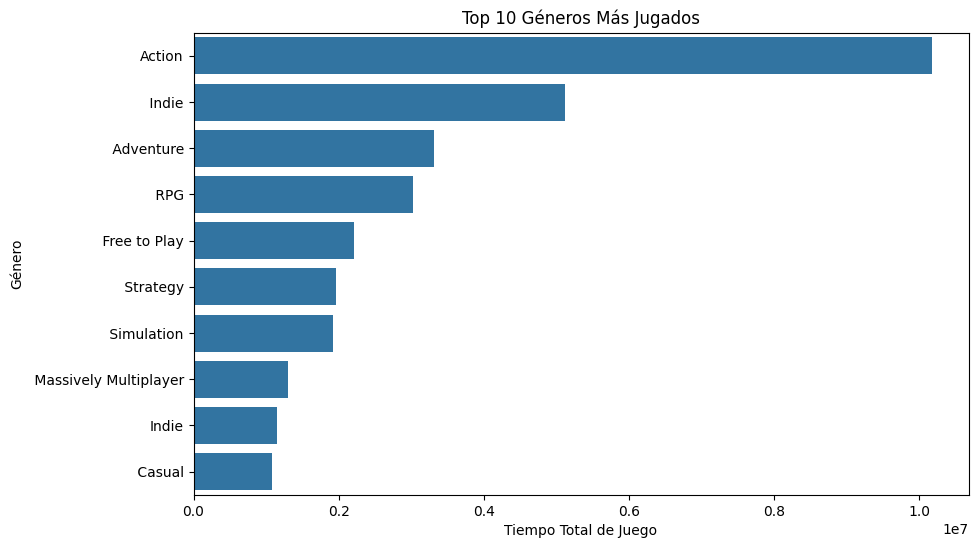

In [30]:
# Crear el gráfico de barras para los 10 géneros más jugados
top_10_genres = playtime_per_genre.head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_genres.values, y=top_10_genres.index)
plt.title('Top 10 Géneros Más Jugados')
plt.xlabel('Tiempo Total de Juego')
plt.ylabel('Género')
plt.show()

### Cantidad de juegos por género

Revisamos la cantidad de juegos por cada género con el fin de tener un concocimiento más acabado del co portamiento de los datos de la columna genres. Algunas conclusiones:

Hay una amplia variedad de géneros representados, desde géneros populares y comunes como "casual", "aventura", "estrategia" y "simulación", hasta nichos más específicos como "design & illustration" y "utilities". Esto refleja una diversidad en los tipos de juegos ofrecidos, lo que podría atraer a una base de jugadores amplia y variada. Esto implica un desafío para la recolección de datos, pues el comportamiento de los juadores frente a distintos géneros de juego puede diferir de manera significativa. 

Por otro lado, podemos afirmar que hay una correlación positiva entre los géneros más jugados y los géneros con más juegos. Es presumible que los desarroladores publiquen juegos de aquellos géneros que tienen más demanda.

In [31]:
# Asegurarse de que la columna 'genres' está en formato de lista
df_sg_copy = df_sg.copy()
df_sg_copy['genres'] = df_sg_copy['genres'].str.split(',')




In [32]:
# Expandir los géneros
df_sg_exploded = df_sg_copy.explode('genres')



In [33]:
# Contar la cantidad de juegos por género
genre_counts = df_sg_exploded['genres'].value_counts()


In [34]:

# Mostrar la cantidad de juegos por género
print("Cantidad de Juegos por Género:")
print(genre_counts)

Cantidad de Juegos por Género:
genres
 Indie                        11938
Action                        10648
 Strategy                      5587
 Simulation                    4692
 RPG                           4478
Casual                         4254
Adventure                      4122
 Casual                        3796
 Adventure                     3672
Indie                          3152
Simulation                     1808
 Free to Play                  1386
 Early Access                  1381
 Sports                        1150
Strategy                       1095
 Massively Multiplayer          956
RPG                             638
 Racing                         613
Free to Play                    479
Racing                          437
Design &amp; Illustration       322
 Web Publishing                 252
 Utilities                      236
Animation &amp; Modeling        168
nan                             146
 Design &amp; Illustration      129
Utilities                 

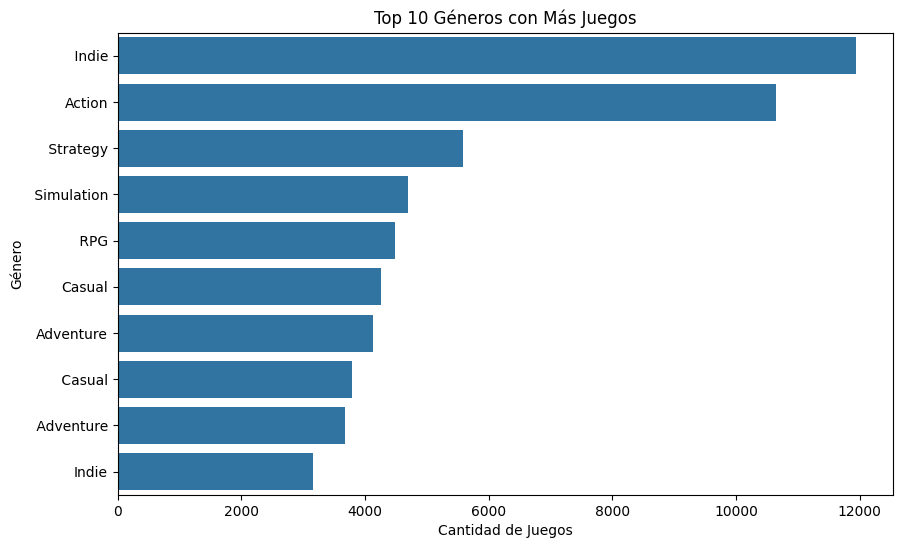

In [35]:
# Crear un gráfico de barras para los primeros 10 géneros con más juegos
top_10_genres = genre_counts.head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_genres.values, y=top_10_genres.index)
plt.title('Top 10 Géneros con Más Juegos')
plt.xlabel('Cantidad de Juegos')
plt.ylabel('Género')
plt.show()

## Visualización de datos de la columna "sentiment_analysis"

A continuación exploramos la columna "sentiment_analysys" observando su distribución. A partir de estos datos, podemos arrribar a algunas conclusiones:

Predominio de Sentimientos Positivos: Un 56.54% de las entradas tienen un sentimiento positivo (representado por el número 2). Esto indica que la mayoría de las reseñas o comentarios asociados a los juegos del dataset son positivos. Para un modelo de recomendación, esto puede indicar que los usuarios generalmente están satisfechos con los juegos que juegan, lo que podría ser un factor importante para recomendar juegos similares.

Presencia Significativa de Sentimientos Neutrales y Negativos: Aproximadamente un 43% de las entradas se distribuyen entre sentimientos neutrales (21.97%) y malos (21.49%). Esto es importante porque muestra que una proporción significativa de reseñas no son completamente positivas, lo cual es valioso para entender mejor las preferencias del usuario y para equilibrar las recomendaciones.

In [36]:
# Contar la frecuencia de cada categoría en 'sentiment_analysis'
sentiment_counts = df_ur['sentiment_analysis'].value_counts()

# Calcular el porcentaje de cada categoría
sentiment_percentages = sentiment_counts / sentiment_counts.sum() * 100

# Imprimir los porcentajes
print("Porcentajes de Sentimiento:")
for sentiment, percentage in sentiment_percentages.items():
    print(f"{sentiment} ({'Malo' if sentiment == 0 else 'Neutral' if sentiment == 1 else 'Positivo'}): {percentage:.2f}%")

Porcentajes de Sentimiento:
2 (Positivo): 56.54%
1 (Neutral): 21.97%
0 (Malo): 21.49%


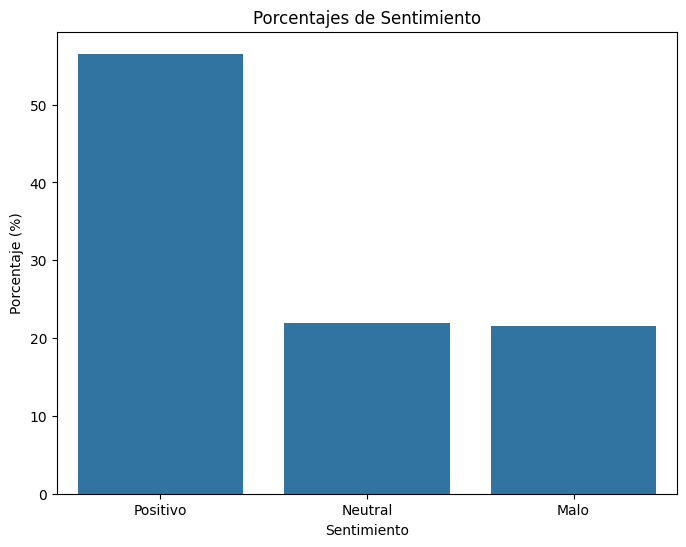

In [37]:
# Crear etiquetas para las categorías de sentimiento
labels = ['Malo' if sentiment == 0 else 'Neutral' if sentiment == 1 else 'Positivo' for sentiment in sentiment_percentages.index]

# Crear un gráfico de barras para los porcentajes de sentimiento
plt.figure(figsize=(8, 6))
sns.barplot(x=labels, y=sentiment_percentages.values)
plt.title('Porcentajes de Sentimiento')
plt.xlabel('Sentimiento')
plt.ylabel('Porcentaje (%)')
plt.show()


## Visualización de datos de la columna "Recommend"

Podemos observar un predominio de recomendaciones positivas, lo cual concuerda con lo visto previamente con la columna "sentiment_analysis". Con 52,473 recomendaciones positivas ("True") frente a 6,832 recomendaciones negativas ("False"), nos sugiere que la mayoría de los usuarios tienden a recomendar los juegos que han jugado.

Con todo, es necesario considerar un posible sesgo en las reseñas. Esto porque los usuarios pueden ser más propensos a dejar una reseña cuando tienen una experiencia positiva. Además, Si la columna "sentiment_analysis" ya proporciona una medida detallada de la percepción de los usuarios (positiva, neutral, negativa), la columna recommend (que parece ser una medida binaria de recomendación) podría ser algo redundante. La información más matizada de sentiment_analysis podría ser suficiente para capturar las preferencias y opiniones de los usuarios.


Distribución de Recomendaciones:
recommend
True     52473
False     6832
Name: count, dtype: int64


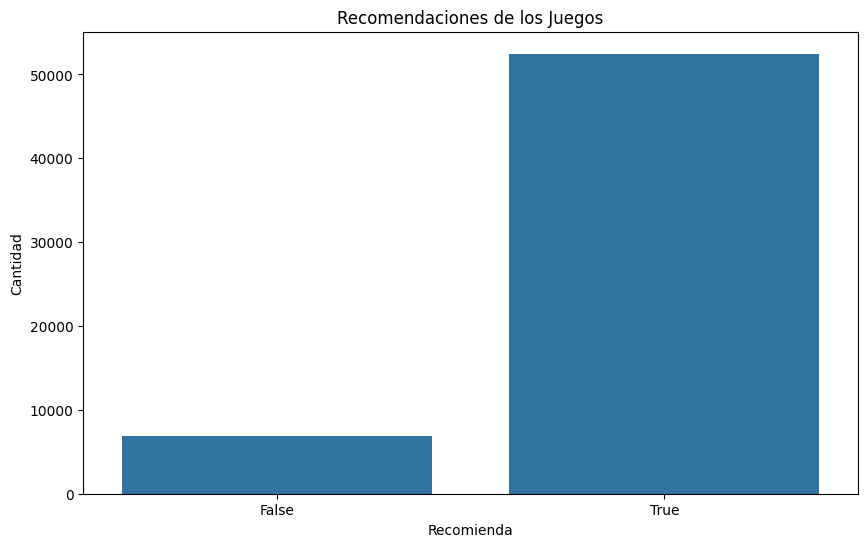

In [38]:
# Análisis de Recommend (Recomendar)
print("\nDistribución de Recomendaciones:")
print(df_ur['recommend'].value_counts())

plt.figure(figsize=(10, 6))
sns.countplot(x='recommend', data=df_ur)
plt.title('Recomendaciones de los Juegos')
plt.xlabel('Recomienda')
plt.ylabel('Cantidad')
plt.show()


## Visualización de la columna "release_year"

Se utiliza en este caso la columna playtime_forever_log (es decir, con transformación logarítimica) para sumar los horas de juego, pues nos ofrece una visión más equilibrada y proporcional de las tendencias de juego a lo largo del tiempo, atenuando el efecto de juegos individuales con cifras extraordinariamente altas de horas jugadas y proporcionando una comparación más justa entre años diferentes. En definitiva, neutralizando la presencia de outliers es posible obtener una imagen más clara de la tendencia general a lo largo de los años.

Los años más recientes, especialmente de 2010 a 2016, muestran las cantidades más altas de tiempo de juego en términos logarítmicos. Esto sugiere una tendencia creciente en el tiempo de juego a lo largo de los años, probablemente debido al aumento en la cantidad de jugadores y la disponibilidad de juegos.

Años más antiguos, como los de la década de 1990 y principios de 2000, también muestran valores de juego significativos, aunque menores que los años más recientes. Esto puede reflejar una base de jugadores activa consistente a lo largo del tiempo, aunque con menos horas totales en comparación con los años más recientes.

In [39]:
# Combinar df_ui y df_sg usando 'item_id' de df_ui y 'id' de df_sg
combined_df = pd.merge(df_ui[['item_id', 'playtime_forever_log']], 
                       df_sg[['id', 'release_year']], 
                       left_on='item_id', 
                       right_on='id')





In [40]:
# Eliminar la columna 'id' ya que es redundante después del merge
combined_df.drop('id', axis=1, inplace=True)



In [41]:
# Agrupar por 'release_year' y sumar 'playtime_forever'
playtime_by_year = combined_df.groupby('release_year')['playtime_forever_log'].sum()



In [42]:
# Ordenar los resultados
sorted_playtime_by_year = playtime_by_year.sort_values(ascending=False)

# Imprimir los resultados
print(sorted_playtime_by_year)

release_year
2012    2.280593e+06
2013    2.066392e+06
2014    1.902808e+06
2015    1.749367e+06
2011    1.467685e+06
2010    9.904655e+05
2009    8.605221e+05
2016    8.126217e+05
2006    5.719820e+05
2017    4.988469e+05
2008    3.066303e+05
2004    3.053208e+05
2007    2.709347e+05
2005    1.488482e+05
2003    1.196462e+05
2000    4.835785e+04
1999    4.617044e+04
1998    4.079725e+04
2001    3.432517e+04
2002    3.341670e+04
1997    2.438604e+04
1995    8.617690e+03
1994    4.832644e+03
1996    4.496429e+03
1993    3.147393e+03
1990    1.397257e+03
1988    8.730027e+02
1992    6.701220e+02
1989    2.381582e+02
1983    2.312264e+02
2018    1.664198e+02
1991    1.357763e+02
1987    9.955870e+01
1984    3.638878e+01
Name: playtime_forever_log, dtype: float64


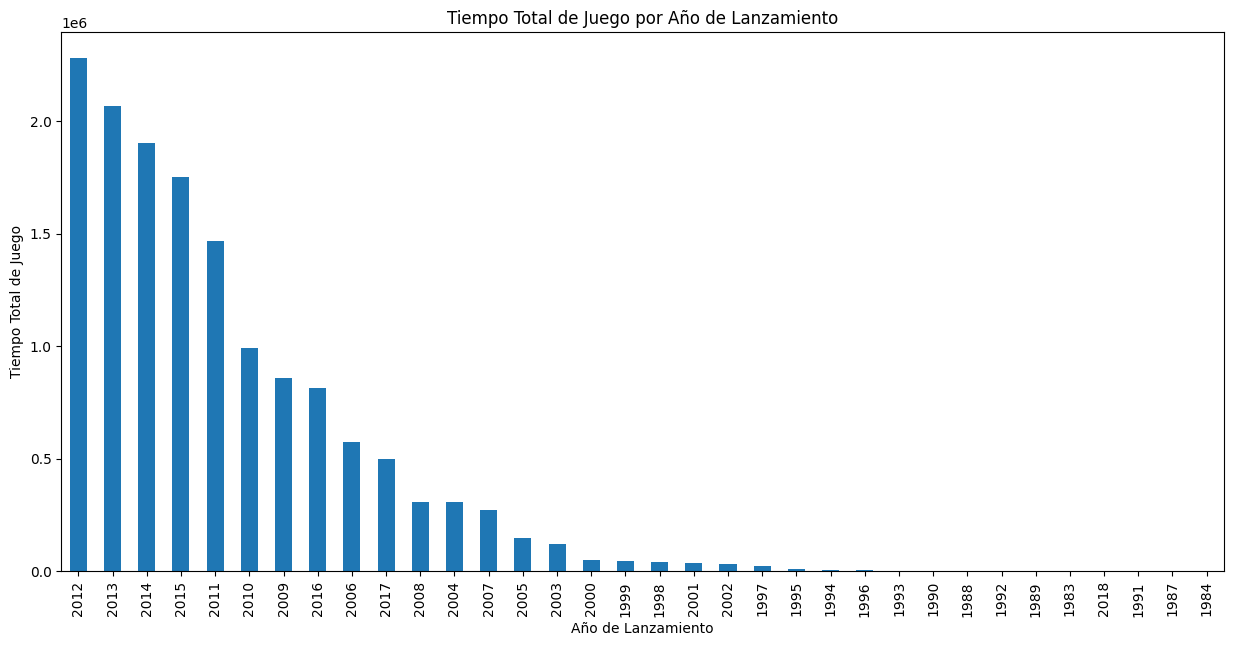

In [43]:
import matplotlib.pyplot as plt

# Crear un gráfico de barras
sorted_playtime_by_year.plot(kind='bar', figsize=(15, 7))

# Añadir títulos y etiquetas
plt.title('Tiempo Total de Juego por Año de Lanzamiento')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Tiempo Total de Juego')

# Mostrar el gráfico
plt.show()


## Matriz de correlación

Para construir una matriz de correlación útil para nuestro modelo de recomendación de videojuegos (item-item), es importante considerar solo aquellas variables que son relevantes para el sistema de recomendación..

"sentiment_analysis": Es una variable numérica y podría tener influencia en la recomendación, ya que refleja la percepción de los usuarios sobre los juegos.

"playtime_forever": Es una medida numérica del tiempo que un usuario ha pasado jugando un juego, lo cual es relevante para entender las preferencias de los usuarios.

"playtime_forever_log": La versión logarítmica de "playtime_forever" puede ser útil para normalizar la distribución y podría ser más efectiva para el análisis.

"price": Aunque el precio de un juego no es directamente un indicador de preferencia, podría estar correlacionado con ciertos tipos de juegos que los usuarios prefieren.

"release_year": Puede ser interesante explorar si hay alguna relación entre el año de lanzamiento de un juego y su popularidad o las horas jugadas.

Las columnas que son categóricas o identificadores únicos no son apropiadas para una matriz de correlación, como lo es el caso de las columnas como "user_id", "item_id", "steam_id", "item_name", "title", "developer" y "genres". Aunque esta última se podría incorporar después de aplicar one-hot encoding, esto puede resultar en una matriz muy grande y dispersa, lo que podría complicar el análisis y la interpretación.



Antes de realizar la matriz de correlación debemos tomar una muestra del DataFrame df_ui puesto que tiene más de 3 millones de entradas y eso imposibilita su manipulación. Tomamos una muestra aletoria de 27635 muestras para igualarlo a los dataframes restantes.

In [44]:
# Crear una muestra aleatoria de 27635 filas
df_ui_muestra = df_ui.sample(n=27635)

# Verificar la información del DataFrame de muestra para confirmar el tamaño
df_ui_muestra.info()


<class 'pandas.core.frame.DataFrame'>
Index: 27635 entries, 157259 to 2580175
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   user_id               27635 non-null  object 
 1   items_count           27635 non-null  int64  
 2   steam_id              27635 non-null  int64  
 3   item_id               27635 non-null  Int64  
 4   item_name             27635 non-null  object 
 5   playtime_forever      27635 non-null  float64
 6   playtime_forever_log  27635 non-null  float64
dtypes: Int64(1), float64(2), int64(2), object(2)
memory usage: 1.7+ MB


In [45]:
# Combinar df_ur y df_ui usando 'item_id'
combined_df_1 = pd.merge(df_ur[['item_id', 'sentiment_analysis']], 
                         df_ui_muestra[['item_id', 'playtime_forever_log']], 
                         on='item_id')

In [46]:
# Combinar el resultado anterior con df_sg
combined_df = pd.merge(combined_df_1, 
                       df_sg[['id', 'price', 'release_year']], 
                       left_on='item_id', 
                       right_on='id')

In [47]:
# Ahora 'combined_df' tiene las columnas requeridas: 'sentiment_analysis', 'playtime_forever_log', 'price', y 'release_year'
print(combined_df.head())

   item_id  sentiment_analysis  playtime_forever_log    id  price  \
0     1250                   2              4.820282  1250  19.99   
1     1250                   2              5.056246  1250  19.99   
2     1250                   2              8.681181  1250  19.99   
3     1250                   2              8.611594  1250  19.99   
4     1250                   2              6.520621  1250  19.99   

   release_year  
0          2009  
1          2009  
2          2009  
3          2009  
4          2009  


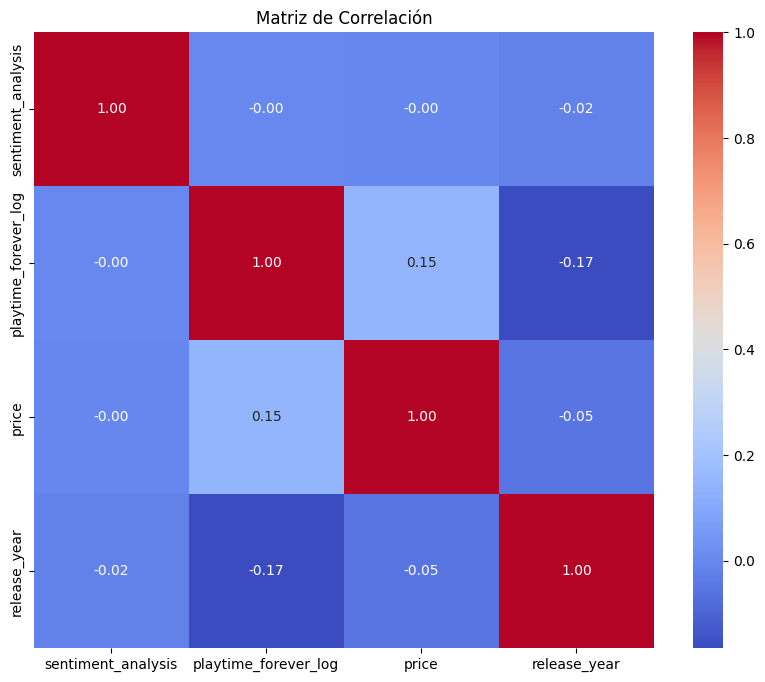

In [48]:

# Crear la matriz de correlación
correlation_matrix = combined_df[['sentiment_analysis', 'playtime_forever_log', 'price', 'release_year']].corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()


Conclusión para el modelo de recomendación item-item:

Playtime_Forever_Log es la variable con la correlación más fuerte junto a price, aunque esta última sigue siendo baja. Playtime_forever_log es una variable relevante para el modelo, ya que el tiempo que los usuarios invierten en un juego puede influir en las recomendaciones de juegos similares.

Por su parte, la columna price aunque su correlación con el tiempo de juego no es muy alta, podría ser útil para identificar juegos dentro de rangos de precio similares.

Finalmente, las columnas Sentiment_Analysis y Release_Year tienen correlaciones muy bajas con las otras variables, lo que sugiere que podrían no ser tan relevantes para este modelo específico de recomendación basado en características de los juegos como el tiempo de juego y el precio.

In [49]:

# Guardar df_ui en formato Parquet
df_ui.to_parquet('../DataSet/definitivo_df_ui.parquet')

In [50]:
# Guardar df_sg en formato Parquet
df_sg.to_parquet('../DataSet/definitivo_df_sg.parquet')